# Avacado Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Download the zip file from github and then read it

data=pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.shape

(18249, 14)

In [5]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no missing values

In [7]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

There are three object data types so we have do some manipulation to convert it into a float data type

    * Date
    * type
    * region

                                            Feature Engineering
    
Convert date into numeric form by seprating date into day,month and then drop that Date column from the set

In [7]:
data['Date']=pd.to_datetime(data['Date'])
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month

In [8]:
data=data.drop(['Date'],axis=1)

In [9]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


# Visualisation

                                    Visualising the categorical data

In [10]:
data_visualization_nominal=data[['type','region']].copy()
data_visualization_nominal.columns

Index(['type', 'region'], dtype='object')

conventional    9126
organic         9123
Name: type, dtype: int64


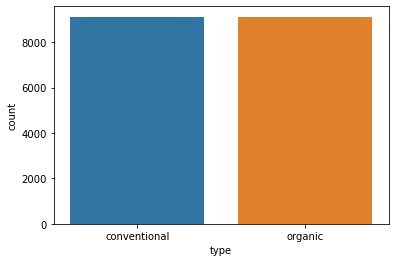

In [11]:
ax= sns.countplot(x='type',data=data_visualization_nominal)
print(data_visualization_nominal['type'].value_counts())

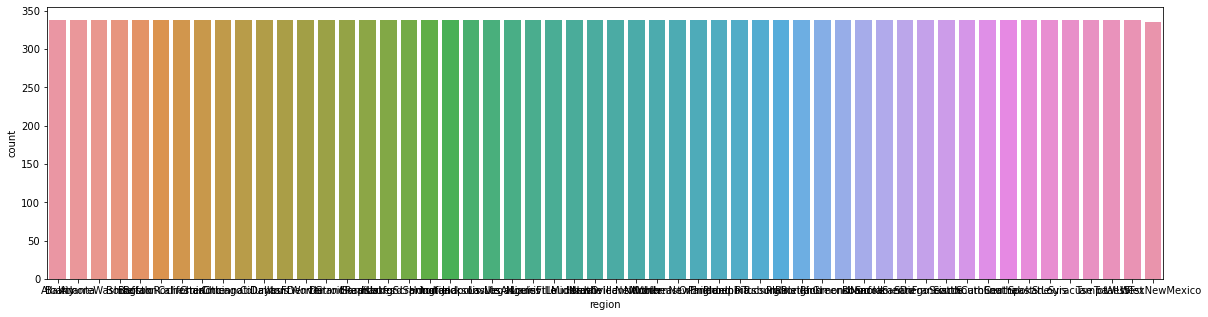

In [12]:
plt.figure(figsize=(20,5))
ax= sns.countplot(x='region',data=data_visualization_nominal)

                                     Visualising the continuous data

In [13]:
data_visualization_continuous=data.drop(['type','region'],axis=1)
data_visualization_continuous.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Day',
       'Month'],
      dtype='object')

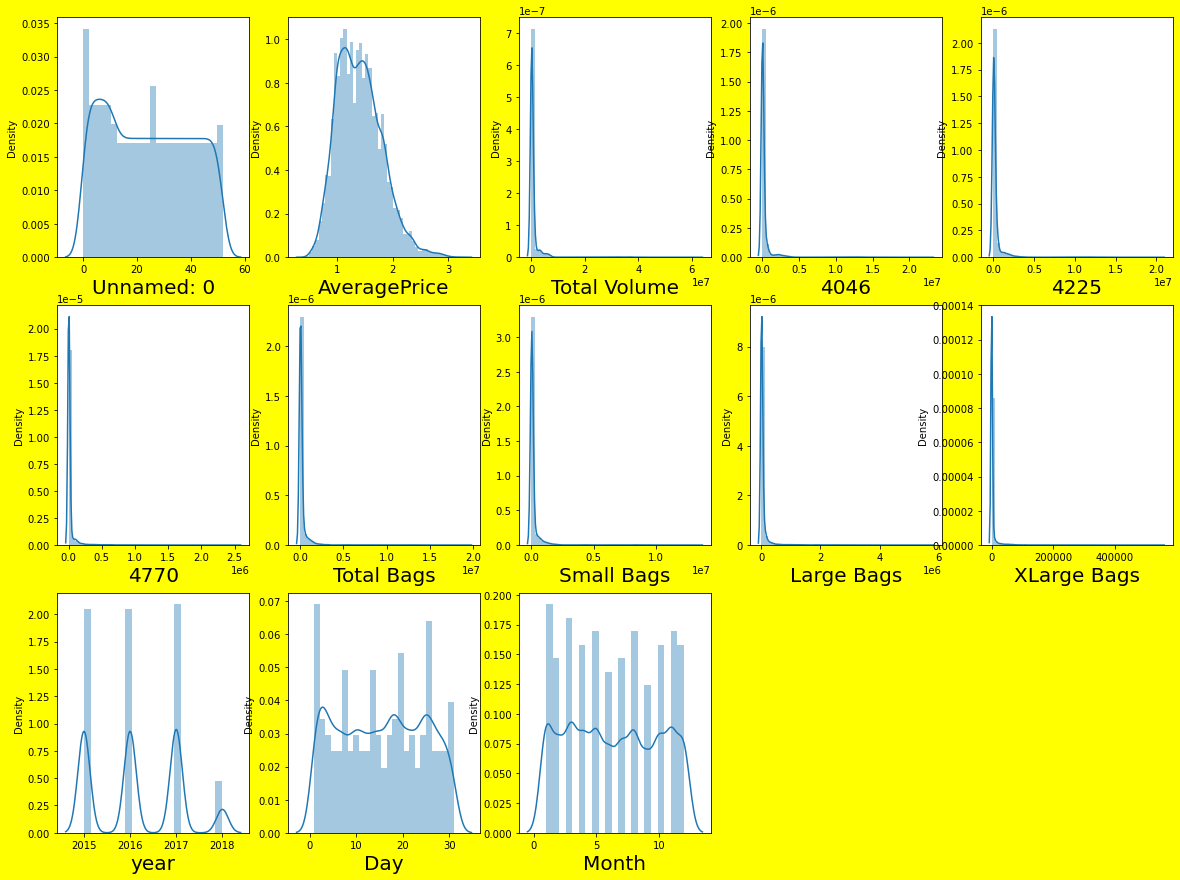

In [14]:
plt.figure(figsize=(20,15),facecolor = 'yellow')
num =1

for column in data_visualization_continuous:
    if num <=13:
        ax = plt.subplot(3,5,num)
        sns.distplot(data_visualization_continuous[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()    

                                        Encode the object data type

In [15]:
enc=OrdinalEncoder()

In [16]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [17]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,27,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,20,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,13,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,29,11


Data is ready for the analysis after removing the object data.

# Analysis

In [18]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,15.466984,6.372842
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,8.984552,3.525034
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,7.000000,3.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,16.000000,6.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,23.000000,10.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,31.000000,12.000000


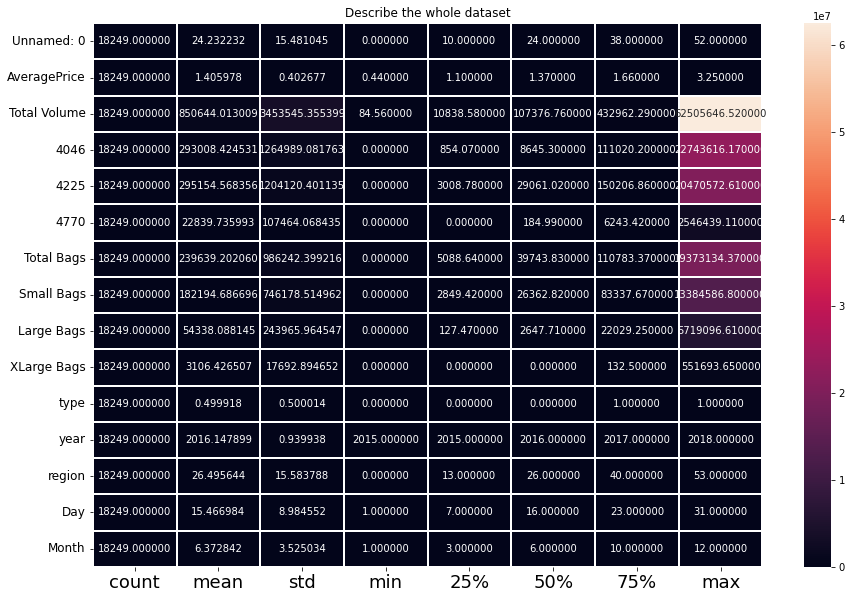

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

The mean,std,minimum and maximum values of all the columns:
    
    * Unnamed 
            mean = 24.23
            std = 15.48
            minimum = 0.00
            maximum = 52.00
            
    * AveragePrice
            mean = 1.40
            std = 0.40
            minimum = 0.44
            maximum = 3.25
            
    * Total Volume 
            mean = 34.53545.35
            std = 84.56
            minimum = 10838.58
            maximum = 62505646.52
            
    * 4046  
            mean = 293008.42
            std = 1264989.08
            minimum = 0.00
            maximum = 2743616.17
            
    * 4225           
            mean = 295154.56
            std = 1204120.40
            minimum = 0.00
            maximum = 20470572.61
            
    * 4770    
            mean = 22839.73
            std = 107464.06
            minimum = 0.00
            maximum = 2546439.11
            
    * Total Bags 
            mean = 239639.20
            std = 986242.39
            minimum = 0.00
            maximum = 9373134.37
            
    * Small Bags 
            mean = 182194.68
            std = 746178.51
            minimum = 0.00
            maximum = 13384586.80
            
    * Large Bags    
            mean = 54338.08
            std = 243965.96
            minimum = 0.00
            maximum = 6719096.61
            
    * XLarge Bags   
            mean = 3106.42
            std = 17692.89
            minimum = 0.00
            maximum = 551693.65
            
    * type   
            mean = 0.49
            std = 0.50
            minimum = 0.00
            maximum = 1.00
            
    * year   
            mean = 2016.14
            std = 0.93
            minimum = 2015.00
            maximum = 2018.00
            
    * region 
            mean = 26.49
            std = 15.58
            minimum = 0.00
            maximum = 53.00
            
    * Day   
            mean = 15.46
            std = 8.98
            minimum = 1.00
            maximum = 31.00
            
    * Month 
            mean = 6.37
            std = 3.52
            minimum = 1.00
            maximum = 12.00

In [20]:
data.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489,-0.202489,-0.482971
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.061157,0.075134
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.013212,-0.015344
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.014375,-0.014522
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.014567,-0.015892
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.012446,-0.024220
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.008687,-0.013061
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.007999,-0.012432
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.010477,-0.014330
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.002364,-0.006182


<AxesSubplot:>

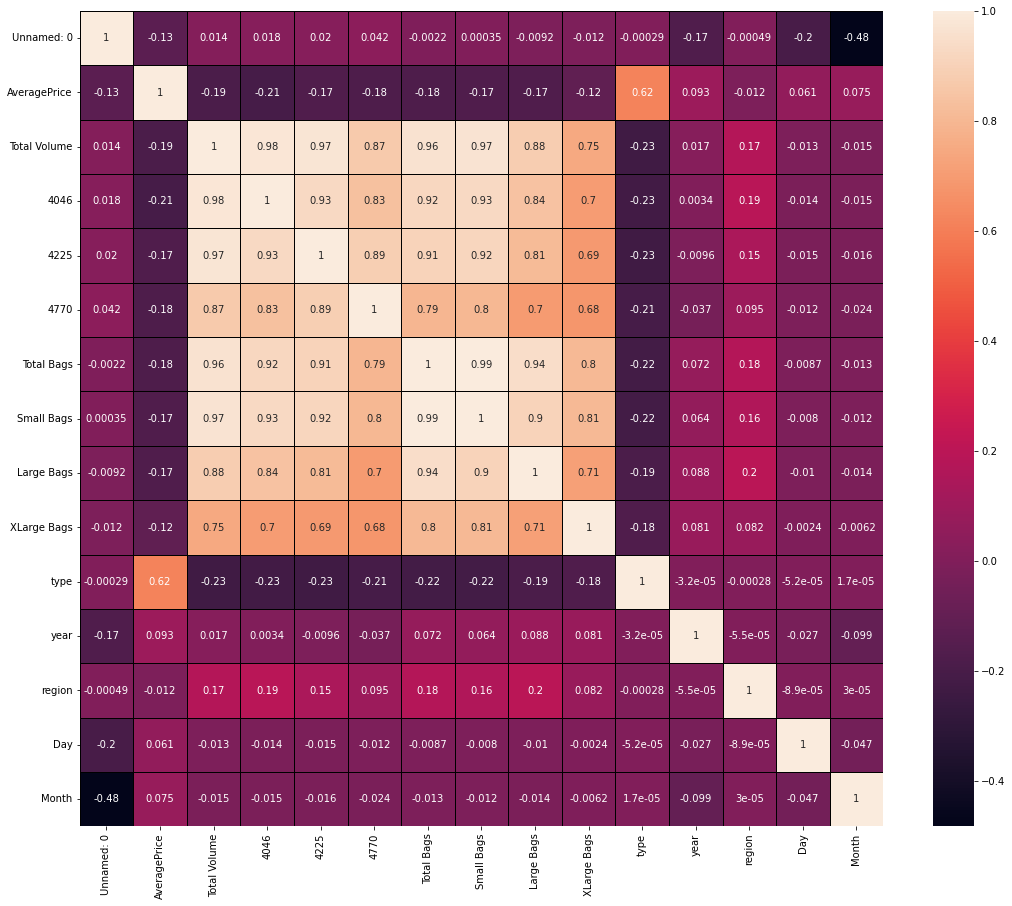

In [21]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

                                       Multicolinearity

<AxesSubplot:xlabel='4046', ylabel='Total Volume'>

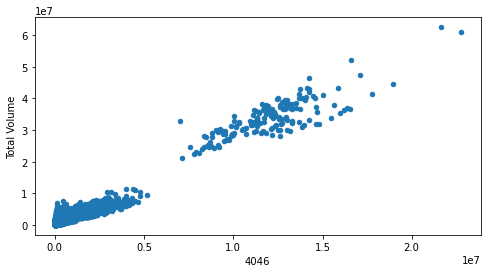

In [22]:
data.plot(kind='scatter', x='4046', y='Total Volume',figsize=(8,4))

<AxesSubplot:xlabel='4225', ylabel='Total Volume'>

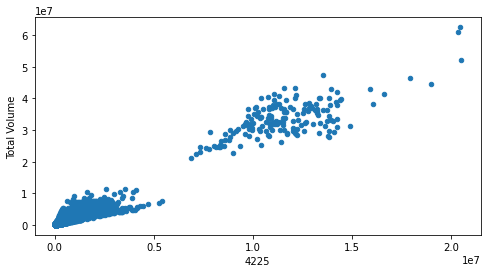

In [23]:
data.plot(kind='scatter', x='4225', y='Total Volume',figsize=(8,4))

<AxesSubplot:xlabel='Small Bags', ylabel='Total Volume'>

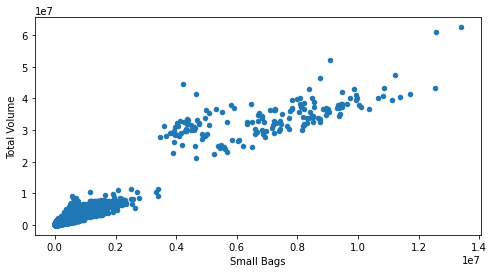

In [24]:
data.plot(kind='scatter', x='Small Bags', y='Total Volume',figsize=(8,4))

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

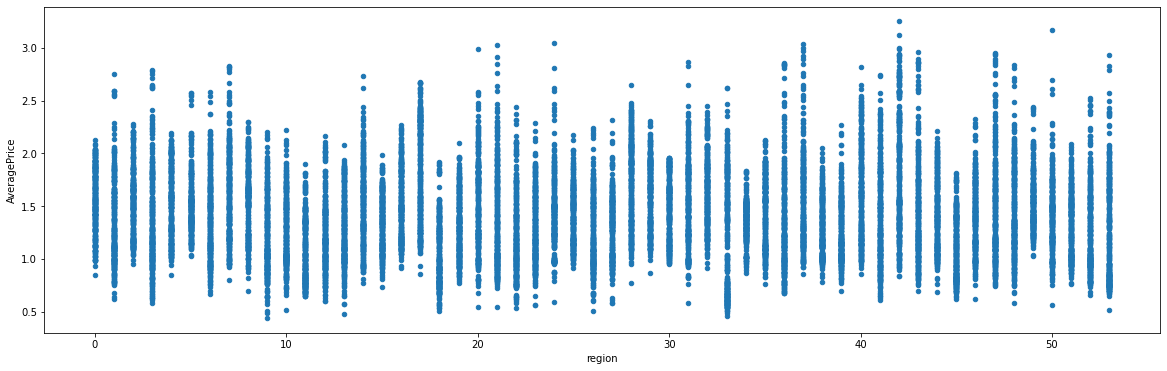

In [25]:
data.plot(kind='scatter', x='region', y='AveragePrice',figsize=(20,6))

In every region Average Price is in between 1 to 2 and 
Some region Average is ib between 0.5 to 1 and 2 to 3.

                                               Outliers

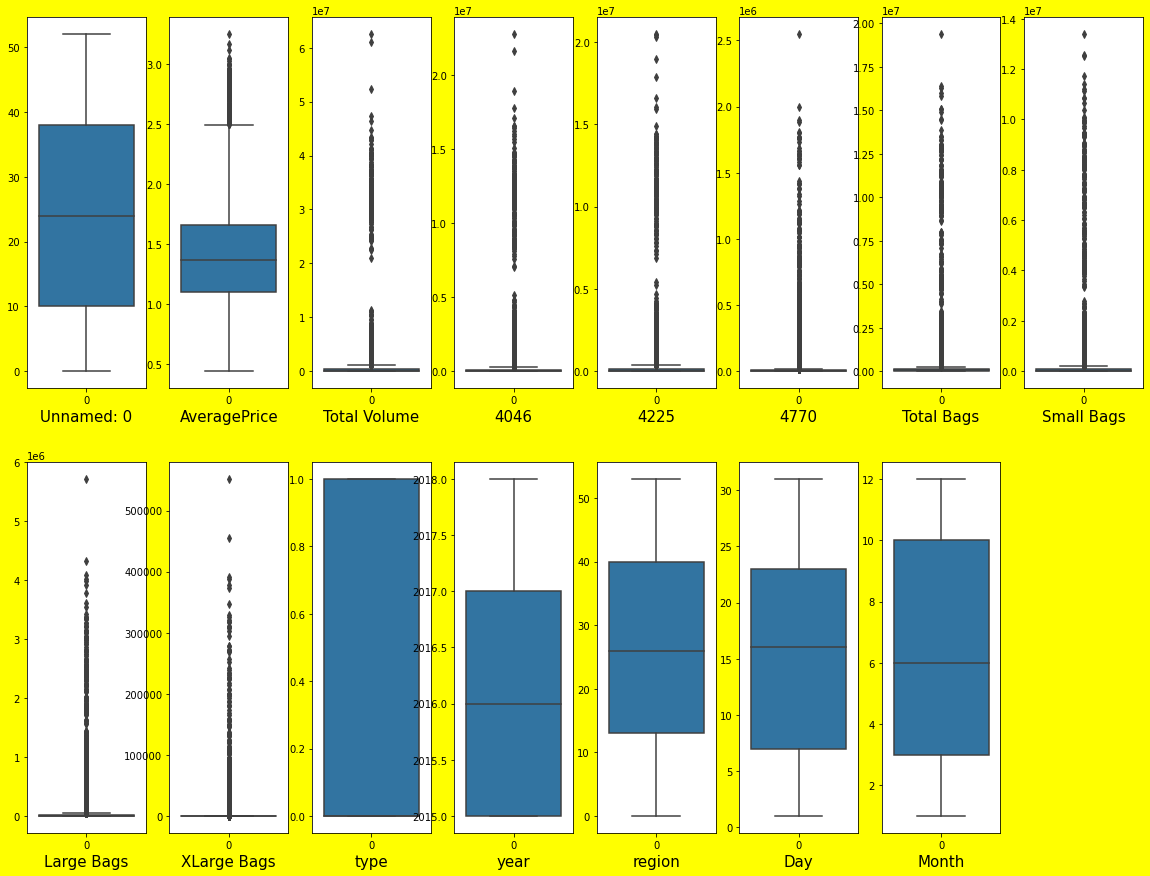

In [26]:
plt.figure(figsize=(20,15),facecolor='yellow')
number = 1

for column in data:
    if number <=15:
        plt.subplot(2,8,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

Outliers are present in the columns:
    
    * AveragePrice
    * Total Volume     
    * 4046             
    * 4225             
    * 4770            
    * Total Bags       
    * Small Bags       
    * Large Bags       
    * XLarge Bags

                                        Skewness

In [27]:
data.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Day             -0.001609
Month            0.047551
dtype: float64

Take threshold range of the skewness is (-0.5,0.5)

Skewness is present in the columns:
    
    * AveragePrice
    * Total Volume     
    * 4046             
    * 4225             
    * 4770            
    * Total Bags       
    * Small Bags       
    * Large Bags       
    * XLarge Bags 
    

# Target Variable:    AveragePrice

                                             REGRESSION PROBLEM
                                             
Do analysis based on AveragePrice

In [28]:
data.corr()['AveragePrice']

Unnamed: 0     -0.133008
AveragePrice    1.000000
Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
type            0.615845
year            0.093197
region         -0.011716
Day             0.061157
Month           0.075134
Name: AveragePrice, dtype: float64

The correlation of feature variable with target variable(AveragePrice):
    
    * Unnamed has 13% correlation with target variable
    * Total Volume has 19% correlation with target variable 
    * 4046 has 20% correlation with target variable        
    * 4225 has 17% correlation with target variable          
    * 4770 has 17% correlation with target variable     
    * Total Bags has 17% correlation with target variable  
    * Small Bags has 17% correlation with target variable    
    * Large Bags has 17% correlation with target variable   
    * XLarge Bags has 11% correlation with target variable   
    * type has 61% correlation with target variable           
    * year has 9% correlation with target variable          
    * region has 1% correlation with target variable        
    * Day has 6% correlation with target variable            
    * Month has 7% correlation with target variable          

                                  Variance Inflation Factor

In [29]:
x=data.drop(['AveragePrice'],axis=1)
y=data['AveragePrice']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [30]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.509238e+00,Unnamed: 0
1,4.928093e+09,Total Volume
2,6.611787e+08,4046
3,5.990825e+08,4225
4,4.771846e+06,4770
5,2.370316e+14,Total Bags
6,1.364727e+14,Small Bags
7,1.450435e+13,Large Bags
8,7.622368e+10,XLarge Bags
9,1.061738e+00,type


There are eight columns having VIF greater then 5
Drop Total Bags from the dataset because having higher VIF

In [31]:
df=data.drop(['Total Bags'],axis=1)

In [32]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [33]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.509222e+00,Unnamed: 0
1,4.928091e+09,Total Volume
2,6.611781e+08,4046
3,5.990819e+08,4225
4,4.771841e+06,4770
5,2.300631e+08,Small Bags
6,2.459233e+07,Large Bags
7,1.292965e+05,XLarge Bags
8,1.061684e+00,type
9,1.137429e+00,year


Drop column Total Volume from dataset

In [34]:
df=df.drop(['Total Volume'],axis=1)

In [35]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.508304,Unnamed: 0
1,10.111304,4046
2,13.366340,4225
3,5.387989,4770
4,19.500198,Small Bags
5,5.608784,Large Bags
6,3.414523,XLarge Bags
7,1.059856,type
8,1.135720,year
9,1.069330,region


Drop column Small Bags from dataset

In [36]:
df=df.drop(['Small Bags'],axis=1)

In [37]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.507827,Unnamed: 0
1,8.643180,4046
2,10.665675,4225
3,5.152538,4770
4,4.041511,Large Bags
5,2.375529,XLarge Bags
6,1.059856,type
7,1.127609,year
8,1.068346,region
9,1.085268,Day


Drop column 4225 from dataset

In [38]:
df=df.drop(['4225'],axis=1)

In [39]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.507264,Unnamed: 0
1,5.794482,4046
2,3.584975,4770
3,3.871758,Large Bags
4,2.369414,XLarge Bags
5,1.057487,type
6,1.126936,year
7,1.066496,region
8,1.085180,Day
9,1.414757,Month


Still we get VIF greater than 5 in one column so we can not drop them by vif method and consider the orignal dataset

In [40]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,27,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,20,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,13,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,29,11


                                     Remove Outliers

In [41]:
x=data.drop(['AveragePrice'],axis=1)
y=data['AveragePrice']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [42]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64), array([2, 2, 8, ..., 7, 7, 7], dtype=int64))


In [43]:
data_new=data[(z<3).all(axis=1)]

In [44]:
print("Old data frame:",data.shape)
print("New data frame:",data_new.shape)
print("Total dropped rows:",data.shape[0]-data_new.shape[0])

Old data frame: (18249, 15)
New data frame: (17782, 15)
Total dropped rows: 467


In [45]:
data_loss=(18249-17782)/18249*100
print(data_loss,'%')

2.55904433119623 %


There is only a 2% loss on removing the ouliers which can be acceptable  

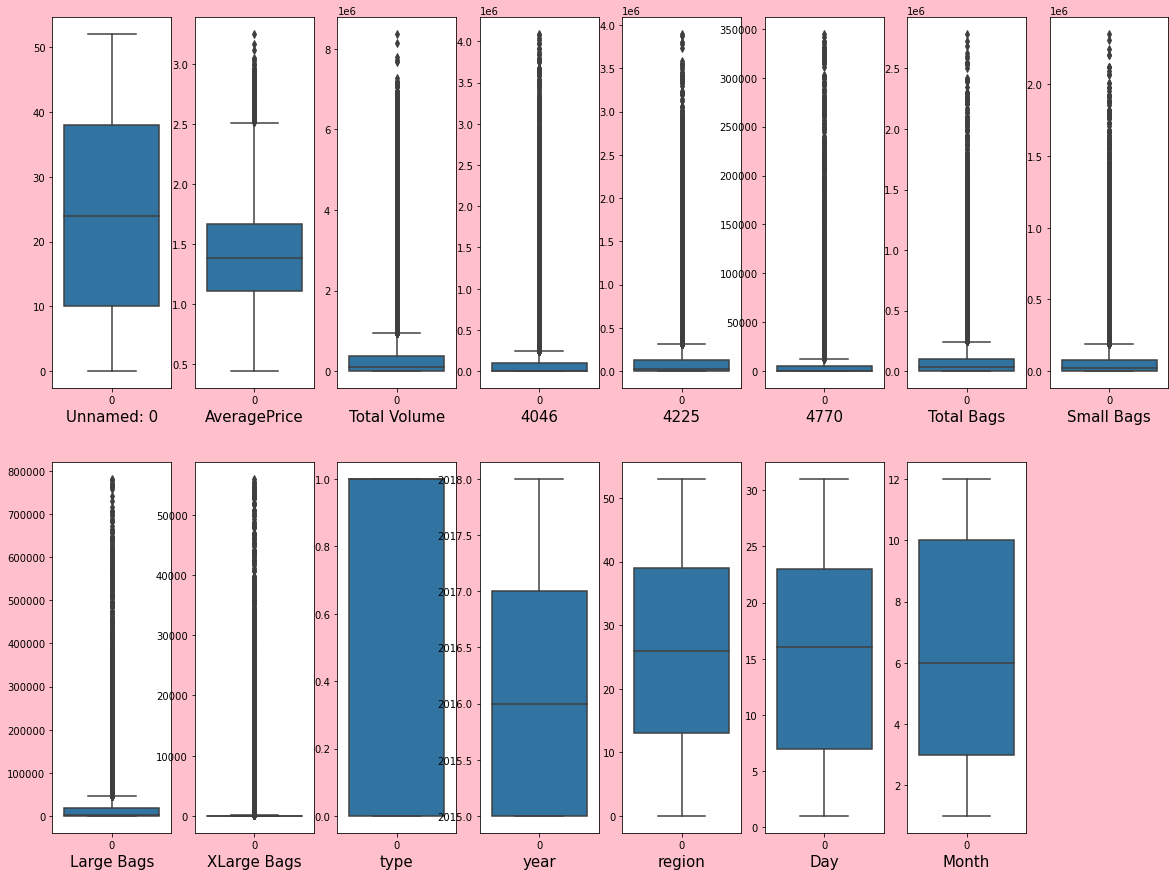

In [46]:
plt.figure(figsize=(20,15),facecolor='pink')
number = 1

for column in data_new:
    if number <=15:
        plt.subplot(2,8,number)
        ax = sns.boxplot(data=data_new[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

Still there are outliers present in the columns are :
    * Total Volume     
    * 4046             
    * 4225             
    * 4770            
    * Total Bags       
    * Small Bags       
    * Large Bags       
    * XLarge Bags

We droped all those columns.

In [47]:
data_new=data_new.drop(['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags'],axis=1)
data_new.head()

,Unnamed: 0,AveragePrice,type,year,region,Day,Month
0,0,1.33,0.0,2015,0.0,27,12
1,1,1.35,0.0,2015,0.0,20,12
2,2,0.93,0.0,2015,0.0,13,12
3,3,1.08,0.0,2015,0.0,12,6
4,4,1.28,0.0,2015,0.0,29,11


In [48]:
data_new.skew()

Unnamed: 0      0.112971
AveragePrice    0.560969
type           -0.052210
year            0.220792
region          0.005773
Day            -0.004650
Month           0.042069
dtype: float64

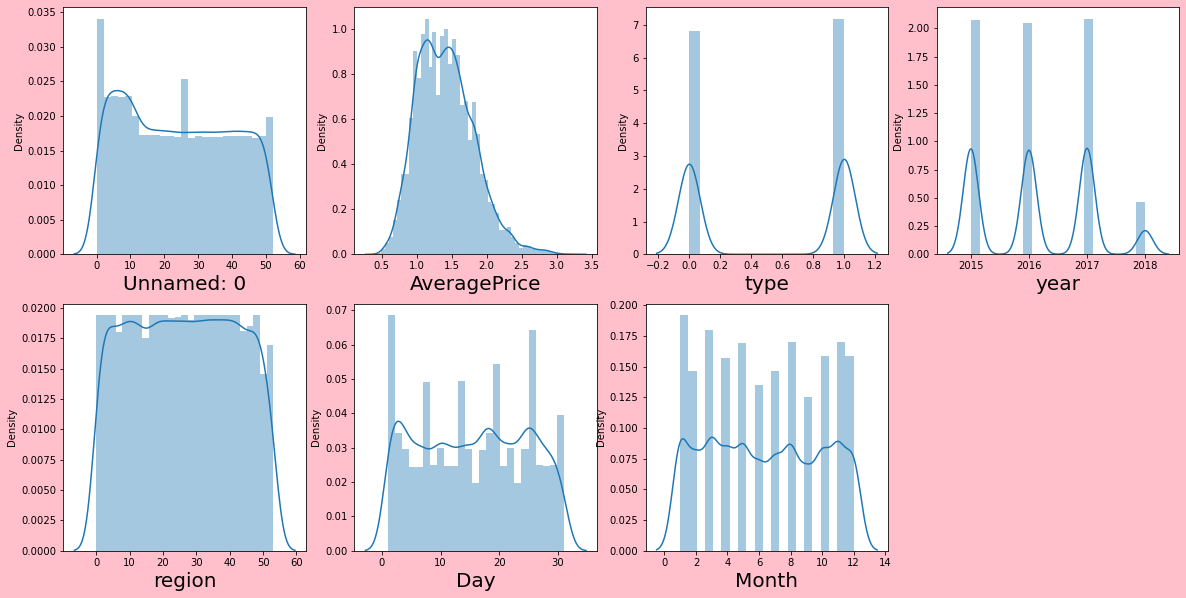

In [49]:
plt.figure(figsize=(20,10),facecolor = 'pink')
num =1

for column in data_new:
    if num <=7:
        ax = plt.subplot(2,4,num)
        sns.distplot(data_new[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()    

Now the proper dataset is formed to fit the models because:

    * The data is normally distributed
    * There is no outliers
    * The data is not skewed

                                          MODEL TESTING

In [50]:
x=data_new.drop(['AveragePrice'],axis=1)
y=data_new['AveragePrice']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

                                          Linear Regression

In [51]:
lr=LinearRegression()

In [52]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 39.7
Testing accuracy score: 38.9


random state 1
Training accuracy score: 39.4
Testing accuracy score: 40.2


random state 2
Training accuracy score: 39.6
Testing accuracy score: 39.4


random state 3
Training accuracy score: 39.4
Testing accuracy score: 40.3


random state 4
Training accuracy score: 39.6
Testing accuracy score: 39.6


random state 5
Training accuracy score: 39.8
Testing accuracy score: 38.7


random state 6
Training accuracy score: 39.5
Testing accuracy score: 39.9


random state 7
Training accuracy score: 39.4
Testing accuracy score: 40.2


random state 8
Training accuracy score: 39.1
Testing accuracy score: 41.2


random state 9
Training accuracy score: 39.4
Testing accuracy score: 40.2


random state 10
Training accuracy score: 39.7
Testing accuracy score: 39.0


random state 11
Training accuracy score: 39.5
Testing accuracy score: 40.0


random state 12
Training accuracy score: 39.5
Testing accuracy score: 39.8


random st

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =99)

In [55]:
pred_test=lr.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

R square score for testing 42.39512305256811


In [56]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -1.4573924308979023


At cross fold 3 the cv score is -0.037046008114681096


At cross fold 4 the cv score is -0.07862229454885805


At cross fold 5 the cv score is 0.005979757066397462


At cross fold 6 the cv score is -0.05459209756035357


At cross fold 7 the cv score is -0.03825273798665518


At cross fold 8 the cv score is -0.044650240374674396


At cross fold 9 the cv score is -0.03082288772425966




In [57]:
lrscore=cross_val_score(lr,x_scaled,y,cv=5)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 0.5979757066397462


In [58]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 0.23263683716130482
Mean square error: 0.091307572926298
Root mean square error: 0.3021714296989343


                                      Decision Tree Regressor

In [59]:
dtr=DecisionTreeRegressor()

In [60]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 73.6


random state 1
Training accuracy score: 100.0
Testing accuracy score: 75.4


random state 2
Training accuracy score: 100.0
Testing accuracy score: 73.9


random state 3
Training accuracy score: 100.0
Testing accuracy score: 74.1


random state 4
Training accuracy score: 100.0
Testing accuracy score: 74.9


random state 5
Training accuracy score: 100.0
Testing accuracy score: 74.2


random state 6
Training accuracy score: 100.0
Testing accuracy score: 75.0


random state 7
Training accuracy score: 100.0
Testing accuracy score: 74.5


random state 8
Training accuracy score: 100.0
Testing accuracy score: 74.3


random state 9
Training accuracy score: 100.0
Testing accuracy score: 72.8


random state 10
Training accuracy score: 100.0
Testing accuracy score: 72.4


random state 11
Training accuracy score: 100.0
Testing accuracy score: 74.3


random state 12
Training accuracy score: 100.0
Testing accuracy score: 74.

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =22)

In [63]:
pred_test=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_test)
print("R2 score:",dtrs*100)

R2 score: 78.16085132511326


In [64]:
for j in range(2,10):
    cv_score=cross_val_score(dtr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -2.0112126946806717


At cross fold 3 the cv score is -0.3084826663300223


At cross fold 4 the cv score is -0.6358017120654149


At cross fold 5 the cv score is -0.600803635499951


At cross fold 6 the cv score is -0.2792272822709992


At cross fold 7 the cv score is -0.16797297231133465


At cross fold 8 the cv score is -0.2728177644505149


At cross fold 9 the cv score is -0.16456668828895782




In [65]:
dtrscore=cross_val_score(dtr,x_scaled,y,cv=9)
dtrc=dtrscore.mean()
print('cross val score:',dtrc*100)

cross val score: -16.123757490602088


In [66]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 0.12681473151532188
Mean square error: 0.03564323868428451
Root mean square error: 0.18879417015438935


                                   Random Forest Regressor

In [97]:
rfr=RandomForestRegressor()

In [101]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    rfr.fit(x_train,y_train)
    pred_train=rfr.predict(x_train)
    pred_test=rfr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 97.8
Testing accuracy score: 84.4


random state 1
Training accuracy score: 97.9
Testing accuracy score: 84.8


random state 2
Training accuracy score: 97.8
Testing accuracy score: 84.9


random state 3
Training accuracy score: 97.8
Testing accuracy score: 85.6


random state 4
Training accuracy score: 97.8
Testing accuracy score: 84.7


random state 5
Training accuracy score: 97.9
Testing accuracy score: 83.9


random state 6
Training accuracy score: 97.9
Testing accuracy score: 84.8


random state 7
Training accuracy score: 97.9
Testing accuracy score: 83.4


random state 8
Training accuracy score: 97.8
Testing accuracy score: 85.1


random state 9
Training accuracy score: 97.9
Testing accuracy score: 83.6


random state 10
Training accuracy score: 97.9
Testing accuracy score: 84.6


random state 11
Training accuracy score: 97.9
Testing accuracy score: 84.0


random state 12
Training accuracy score: 97.9
Testing accuracy score: 84.9


random st

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =93)

In [104]:
pred_test=rfr.predict(x_test)
rfrs=r2_score(y_test,pred_test)
print("R2 score for testing:",rfrs*100)

R2 score for testing: 95.61317145585062


In [100]:
for j in range(2,10):
    cv_score=cross_val_score(rfr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -1.7716324540323707


At cross fold 3 the cv score is -0.14074316959875832


At cross fold 4 the cv score is -0.3196978111781417


At cross fold 5 the cv score is -0.18648679799251083


At cross fold 6 the cv score is 0.0069392606243676895


At cross fold 7 the cv score is 0.14800281378114585


At cross fold 8 the cv score is 0.07320232181944866


At cross fold 9 the cv score is 0.09131052105791714




In [72]:
rfrscore=cross_val_score(rfr,x_scaled,y,cv=7)
rfrc=rfrscore.mean()
print('cross val score:',rfrc*100)

cross val score: 14.372974318407941


In [73]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 0.05276634804610628
Mean square error: 0.0072228606944054
Root mean square error: 0.0849874149177712


                                       Ada Boost Regressor

In [74]:
ada= AdaBoostRegressor()

In [75]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 45.8
Testing accuracy score: 44.5


random state 1
Training accuracy score: 44.9
Testing accuracy score: 45.1


random state 2
Training accuracy score: 44.4
Testing accuracy score: 43.5


random state 3
Training accuracy score: 45.7
Testing accuracy score: 47.0


random state 4
Training accuracy score: 46.2
Testing accuracy score: 44.8


random state 5
Training accuracy score: 45.4
Testing accuracy score: 42.3


random state 6
Training accuracy score: 44.3
Testing accuracy score: 45.4


random state 7
Training accuracy score: 46.0
Testing accuracy score: 45.7


random state 8
Training accuracy score: 45.2
Testing accuracy score: 47.8


random state 9
Training accuracy score: 46.6
Testing accuracy score: 46.1


random state 10
Training accuracy score: 45.5
Testing accuracy score: 44.8


random state 11
Training accuracy score: 45.6
Testing accuracy score: 44.3


random state 12
Training accuracy score: 46.0
Testing accuracy score: 46.2


random st

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 64)

In [77]:
pred_test=ada.predict(x_test)
adas=r2_score(y_test,pred_test)
print("R2 score:",adas*100)

R2 score: 46.079890008806025


In [78]:
for j in range(2,10):
    cv_score=cross_val_score(ada,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -1.858814201535754


At cross fold 3 the cv score is -0.0701747170490767


At cross fold 4 the cv score is -0.19379431244373183


At cross fold 5 the cv score is -0.0537824282162197


At cross fold 6 the cv score is -0.05799426789848372


At cross fold 7 the cv score is -0.05881798892957663


At cross fold 8 the cv score is -0.04486477738678453


At cross fold 9 the cv score is -0.010771465872308261




In [79]:
adascore=cross_val_score(ada,x_scaled,y,cv=9)
adac=adascore.mean()
print('cross val score:',adac*100)

cross val score: -3.6480836311708322


In [80]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 0.2349094533907908
Mean square error: 0.08915701848124966
Root mean square error: 0.2985917254065317


                                      Gradient Boosting Regressor

In [81]:
gb= GradientBoostingRegressor()

In [82]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: 66.5
Testing accuracy score: 65.6


random state 1
Training accuracy score: 66.1
Testing accuracy score: 65.8


random state 2
Training accuracy score: 66.5
Testing accuracy score: 65.2


random state 3
Training accuracy score: 66.0
Testing accuracy score: 66.4


random state 4
Training accuracy score: 66.4
Testing accuracy score: 64.6


random state 5
Training accuracy score: 66.8
Testing accuracy score: 64.6


random state 6
Training accuracy score: 66.3
Testing accuracy score: 65.6


random state 7
Training accuracy score: 67.1
Testing accuracy score: 66.2


random state 8
Training accuracy score: 65.9
Testing accuracy score: 66.5


random state 9
Training accuracy score: 66.9
Testing accuracy score: 65.6


random state 10
Training accuracy score: 66.7
Testing accuracy score: 65.9


random state 11
Training accuracy score: 66.3
Testing accuracy score: 65.8


random state 12
Training accuracy score: 66.2
Testing accuracy score: 66.1


random st

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 58)

In [84]:
pred_test=gb.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score",accuracy)

R square score 67.98518496318809


In [85]:
for j in range(2,10):
    cv_score=cross_val_score(gb,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -1.4565125978107218


At cross fold 3 the cv score is 0.1587435352191078


At cross fold 4 the cv score is 0.2579064967991948


At cross fold 5 the cv score is 0.31460848440528527


At cross fold 6 the cv score is 0.258094195553393


At cross fold 7 the cv score is 0.24269844779802466


At cross fold 8 the cv score is 0.29676759093484373


At cross fold 9 the cv score is 0.32967370528562295




In [86]:
gbscore=cross_val_score(gb,x_scaled,y,cv=9)
gbc=gbscore.mean()
print('cross val score:',gbc*100)

cross val score: 32.9673705285623


In [99]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 0.1727707327322949
Mean square error: 0.05338165248643239
Root mean square error: 0.2310446980270969


The r2_score and cross_validation_score of the models are:
    
    * Linear Regression
           r2_score = 42.39
           cv_score = 0.59
            
    * Decision Tree Regressor
           r2_score = 78.16
           cv_score = -16.00
            
    * Random Forest Regressor
           r2_score = 95.61
           cv_score = 14.37
            
    * Ada Boost Regressor
           r2_score = 46.07
           cv_score = -3.64
            
    * Gradient Boosting Regressor
           r2_score = 67.98
           cv_score = 32.96
            
The Linear Regression and Ada Boost Regressor result poor score for this dataset.
Random Forest Regressor is the better model to get better accuracy and have minimum mean square error also.so,we select that
model

                                       Hyper Parameter Tuning

In [87]:
rfr=RandomForestRegressor()

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
parameters = {'max_features':['auto','sqrt'],
             'max_depth':range(10,35),
             'min_samples_leaf':range(2,5),
             'min_samples_split':range(2,10)}

In [106]:
RCV = RandomizedSearchCV(rfr,parameters,cv=7,n_jobs=-1)
RCV.fit(x_train,y_train)
RCV.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 21}

In [107]:
clf = RandomForestRegressor(min_samples_split=3,min_samples_leaf=3,max_features='auto',max_depth=21)

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
r2_score(y_test,y_pred)*100

84.81231872142286

Previously, we calculate r2 score is 95 and after hyper tuning we get value of r2 score is approx 85. In score there
is no increment after using the technique and gave less value.

The better r2_score is 95.61

                                Plot a graph b/w actual and predicted value

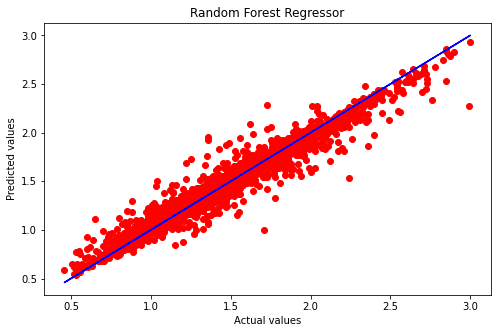

In [109]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,pred_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regressor')                                                                                
plt.show()

                                            Save the file

In [111]:
import pickle

In [112]:
filename='Avacado_AveragePrice_Project.pkl'
pickle.dump(rfr,open(filename,'wb'))

In [114]:
loaded_model= pickle.load(open('Avacado_AveragePrice_Project.pkl','rb'))
result= loaded_model.score(x_test,y_test)*100
print(result)

95.61317145585062


                                            Conclusion

In [115]:
Prediction=pd.DataFrame({"Actual_value":y_test,"Predicted_value":pred_test})
Prediction

,Actual_value,Predicted_value
970,0.74,0.7911
6893,1.45,1.4080
7392,0.77,0.7529
1115,1.03,1.0247
12057,1.87,1.8432
...,...,...
7627,1.27,1.2239
18195,1.23,1.3221
10227,2.16,2.1577
2014,1.14,1.1363


# Target Variable:  region

                                        CLASSIFICATION PROBLEM
                        
Do analysis taking target variable as region

In [116]:
data.corr()['region']

Unnamed: 0     -0.000489
AveragePrice   -0.011716
Total Volume    0.174176
4046            0.192073
4225            0.145726
4770            0.095252
Total Bags      0.175256
Small Bags      0.164702
Large Bags      0.198768
XLarge Bags     0.082281
type           -0.000280
year           -0.000055
region          1.000000
Day            -0.000089
Month           0.000030
Name: region, dtype: float64

In [ ]:
The correlation of feature variable with target variable(region):
    
    * Unnamed has 0% correlation with target variable
    * AveragePrice  has 1% correlation with target variable
    * Total Volume  has 17% correlation with target variable 
    * 4046 has 19% correlation with target variable        
    * 4225 has 14% correlation with target variable         
    * 4770  has 9% correlation with target variable     
    * Total Bags has 17% correlation with target variable  
    * Small Bags has 16% correlation with target variable     
    * Large Bags has 19% correlation with target variable    
    * XLarge Bags  has 8% correlation with target variable    
    * type  has 0% correlation with target variable            
    * year  has 0% correlation with target variable            
    * Day  has 0% correlation with target variable            
    * Month  has 0% correlation with target variable         

                                      Variance Inflation Factor

In [117]:
x=data.drop(['region'],axis=1)
y=data['region']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [118]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.521984e+00,Unnamed: 0
1,1.732332e+00,AveragePrice
2,4.928393e+09,Total Volume
3,6.612187e+08,4046
4,5.991190e+08,4225
5,4.772119e+06,4770
6,2.370316e+14,Total Bags
7,1.364727e+14,Small Bags
8,1.448103e+13,Large Bags
9,7.622174e+10,XLarge Bags


VIF value is greater than 5 in columns,so we first drop Total Bags column having highest VIF

In [119]:
dif=data.drop(['Total Bags'],axis=1)

In [120]:
x=dif.drop(['region'],axis=1)
y=dif['region']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.521968e+00,Unnamed: 0
1,1.732328e+00,AveragePrice
2,4.928387e+09,Total Volume
3,6.612180e+08,4046
4,5.991183e+08,4225
5,4.772114e+06,4770
6,2.300770e+08,Small Bags
7,2.459383e+07,Large Bags
8,1.293045e+05,XLarge Bags
9,1.698769e+00,type


Drop Total Volume column

In [121]:
dif=dif.drop(['Total Volume'],axis=1)

In [122]:
x=dif.drop(['region'],axis=1)
y=dif['region']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.520951,Unnamed: 0
1,1.731983,AveragePrice
2,10.089596,4046
3,13.545090,4225
4,5.385519,4770
5,19.483024,Small Bags
6,5.567080,Large Bags
7,3.415226,XLarge Bags
8,1.695802,type
9,1.148247,year


In [ ]:
Drop Small Bags column

In [123]:
dif=dif.drop(['Small Bags'],axis=1)

In [124]:
x=dif.drop(['region'],axis=1)
y=dif['region']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.520443,Unnamed: 0
1,1.731914,AveragePrice
2,8.643339,4046
3,10.842423,4225
4,5.154937,4770
5,4.014509,Large Bags
6,2.371272,XLarge Bags
7,1.695766,type
8,1.140188,year
9,1.089111,Day


Drop 4225 column

In [125]:
dif=dif.drop(['4225'],axis=1)

In [126]:
x=dif.drop(['region'],axis=1)
y=dif['region']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.520371,Unnamed: 0
1,1.700732,AveragePrice
2,5.729514,4046
3,3.552642,4770
4,3.841837,Large Bags
5,2.363970,XLarge Bags
6,1.671108,type
7,1.138565,year
8,1.088796,Day
9,1.417765,Month


Still we get VIF value greater than 5,so we can consider our orignal dataset

In [127]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,27,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,20,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,13,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,29,11


                                    Remove Outliers

In [128]:
x=data.drop(['region'],axis=1)
y=data['region']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [129]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([3, 3, 9, ..., 1, 1, 1], dtype=int64))


In [130]:
new_data=data[(z<3).all(axis=1)]

In [131]:
print("Old data frame:",data.shape)
print("New data frame:",new_data.shape)
print("Total dropped rows:",data.shape[0]-new_data.shape[0])

Old data frame: (18249, 15)
New data frame: (17651, 15)
Total dropped rows: 598


In [132]:
data_loss=(18249-17651)/18249*100
print(data_loss,'%')

3.276891884486821 %


There is only 3% loss after removing the dataset which can be acceptable 

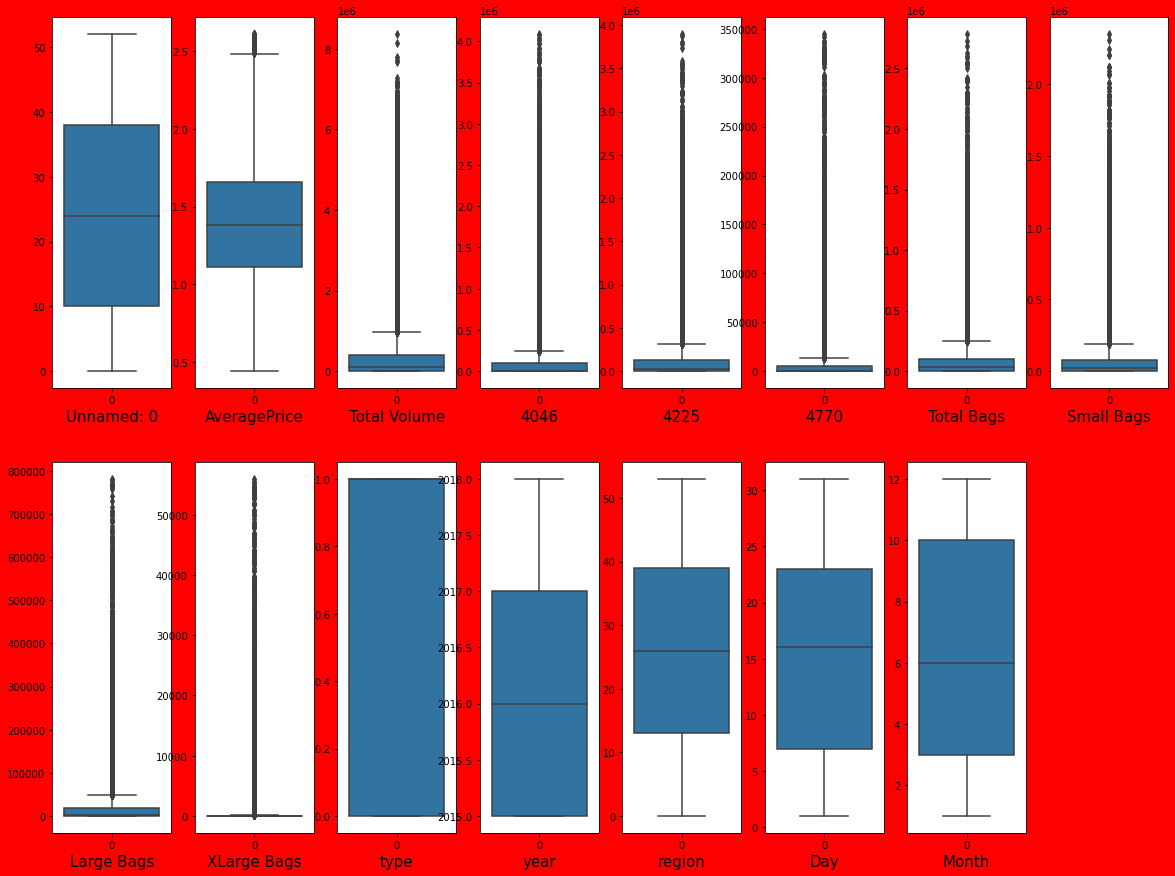

In [134]:
plt.figure(figsize=(20,15),facecolor='red')
number = 1

for column in new_data:
    if number <=15:
        plt.subplot(2,8,number)
        ax = sns.boxplot(data=new_data[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

Still there are outliers present in the columns are :
    
    * AveragePrice
    * Total Volume
    * 4046
    * 4225
    * 4770
    * Total Bags
    * Small Bags
    * Large Bags
    * XLarge Bags
    
So, we drop all of the columns   

In [137]:
new_data=new_data.drop(['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags',
                        'XLarge Bags'],axis=1)
new_data.head()

,Unnamed: 0,type,year,region,Day,Month
0,0,0.0,2015,0.0,27,12
1,1,0.0,2015,0.0,20,12
2,2,0.0,2015,0.0,13,12
3,3,0.0,2015,0.0,12,6
4,4,0.0,2015,0.0,29,11


In [138]:
new_data.skew()

Unnamed: 0    0.106116
type         -0.037741
year          0.229976
region        0.012798
Day          -0.005030
Month         0.046419
dtype: float64

There is no skewness

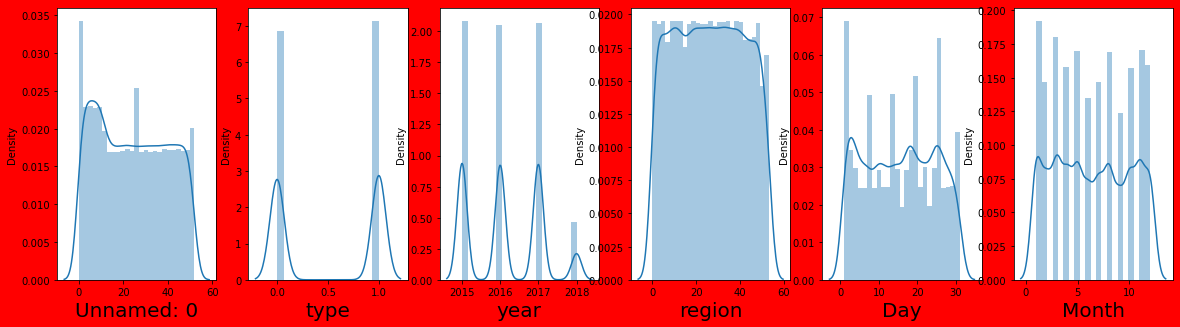

In [141]:
plt.figure(figsize=(20,5),facecolor = 'red')
num =1

for column in new_data:
    if num <=6:
        ax = plt.subplot(1,6,num)
        sns.distplot(new_data[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()    

Now the proper dataset is formed to fit the models because:

* The data is normally distributed
* There is no outliers
* The data is not skewed

                                        MODEL TESTING

In [150]:
new_data['region'].value_counts()

0.0     338
16.0    338
49.0    338
44.0    338
39.0    338
38.0    338
35.0    338
34.0    338
32.0    338
30.0    338
26.0    338
23.0    338
19.0    338
18.0    338
27.0    338
8.0     338
2.0     338
13.0    338
12.0    338
11.0    338
4.0     338
5.0     338
10.0    338
9.0     338
20.0    337
1.0     337
28.0    337
33.0    336
41.0    336
40.0    336
14.0    336
50.0    336
31.0    335
24.0    335
25.0    333
48.0    333
21.0    333
53.0    332
7.0     332
22.0    331
17.0    331
36.0    330
3.0     329
37.0    328
47.0    328
43.0    326
29.0    325
46.0    307
42.0    301
45.0    292
6.0     290
15.0    272
52.0    256
51.0    169
Name: region, dtype: int64

In [153]:
new_data['region']=new_data['region'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,
                                                 29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53],
                                                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,
                                                1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

In [154]:
new_data.head()

,Unnamed: 0,type,year,region,Day,Month
0,0,0.0,2015,0.0,27,12
1,1,0.0,2015,0.0,20,12
2,2,0.0,2015,0.0,13,12
3,3,0.0,2015,0.0,12,6
4,4,0.0,2015,0.0,29,11


In [164]:
x=new_data.drop(['region'],axis=1)
y=new_data['region']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

                                     Logistic Regression

In [165]:
lor=LogisticRegression()

In [166]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lor.fit(x_train,y_train)
    pred_train=lor.predict(x_train)
    pred_test=lor.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 50.9
Testing accuracy score: 49.4


The model perform very well
random state 1
Training accuracy score: 50.8
Testing accuracy score: 50.6


The model perform very well
random state 2
Training accuracy score: 50.8
Testing accuracy score: 50.5


The model perform very well
random state 3
Training accuracy score: 51.0
Testing accuracy score: 49.8


The model perform very well
random state 4
Training accuracy score: 50.8
Testing accuracy score: 50.9


The model perform very well
random state 5
Training accuracy score: 50.5
Testing accuracy score: 51.8


The model perform very well
random state 6
Training accuracy score: 50.8
Testing accuracy score: 50.5


The model perform very well
random state 7
Training accuracy score: 50.7
Testing accuracy score: 51.1


The model perform very well
random state 8
Training accuracy score: 50.6
Testing accuracy score: 51.2


The model perform very well
random state 9
Training accuracy sco

In [167]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=10)  

In [168]:
lor.fit(x_train,y_train)
y_pred = lor.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 50.240725007080144


In [169]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[1255  600]
 [1157  519]]


In [170]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.52      0.68      0.59      1855
         1.0       0.46      0.31      0.37      1676

    accuracy                           0.50      3531
   macro avg       0.49      0.49      0.48      3531
weighted avg       0.49      0.50      0.49      3531



In [171]:
for j in range(2,10):
    cv_score=cross_val_score(lor,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.4925499666514528


At cross fold 3 the cv score is 0.4970253849914714


At cross fold 4 the cv score is 0.5010482581649577


At cross fold 5 the cv score is 0.5017842452482786


At cross fold 6 the cv score is 0.501615000593668


At cross fold 7 the cv score is 0.5037667955324588


At cross fold 8 the cv score is 0.5022368660501224


At cross fold 9 the cv score is 0.5035970134348762




In [172]:
lorscore=cross_val_score(lor,x_scaled,y,cv=7)
lorc=lorscore.mean()
print('cross val score:',lorc*100)

cross val score: 50.376679553245886


                                     K Neighbors Classifier

In [173]:
knn= KNeighborsClassifier()

In [174]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 50.5
Testing accuracy score: 48.8


The model perform very well
random state 1
Training accuracy score: 50.6
Testing accuracy score: 47.9


The model perform very well
random state 2
Training accuracy score: 50.6
Testing accuracy score: 48.1


The model perform very well
random state 3
Training accuracy score: 50.7
Testing accuracy score: 48.1


The model perform very well
random state 4
Training accuracy score: 50.2
Testing accuracy score: 49.5


The model perform very well
random state 5
Training accuracy score: 50.8
Testing accuracy score: 47.1


The model perform very well
random state 6
Training accuracy score: 50.9
Testing accuracy score: 46.6


The model perform very well
random state 7
Training accuracy score: 50.6
Testing accuracy score: 48.2


The model perform very well
random state 8
Training accuracy score: 50.8
Testing accuracy score: 47.1


The model perform very well
random state 9
Training accuracy sco

In [175]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=37) 

In [176]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 49.7309544038516


In [177]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[915 858]
 [917 841]]


In [178]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.50      0.52      0.51      1773
         1.0       0.49      0.48      0.49      1758

    accuracy                           0.50      3531
   macro avg       0.50      0.50      0.50      3531
weighted avg       0.50      0.50      0.50      3531



In [179]:
for j in range(2,10):
    cv_score=cross_val_score(knn,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.5021241965375285


At cross fold 3 the cv score is 0.5019545634933703


At cross fold 4 the cv score is 0.4978193677544237


At cross fold 5 the cv score is 0.5068267863031041


At cross fold 6 the cv score is 0.49872565546772146


At cross fold 7 the cv score is 0.5057506972022975


At cross fold 8 the cv score is 0.5076200406602087


At cross fold 9 the cv score is 0.5070535598202784




In [180]:
knnscore=cross_val_score(knn,x_scaled,y,cv=8)
knnc=knnscore.mean()
print('cross val score:',knnc*100)

cross val score: 50.76200406602087


In [ ]:
                                  Random Forest Classifier

In [181]:
rfc=RandomForestClassifier()

In [182]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 53.3
Testing accuracy score: 39.9


The model perform very well
random state 1
Training accuracy score: 53.1
Testing accuracy score: 40.1


The model perform very well
random state 2
Training accuracy score: 53.0
Testing accuracy score: 40.4


The model perform very well
random state 3
Training accuracy score: 53.1
Testing accuracy score: 40.4


The model perform very well
random state 4
Training accuracy score: 53.0
Testing accuracy score: 40.9


The model perform very well
random state 5
Training accuracy score: 52.9
Testing accuracy score: 40.6


The model perform very well
random state 6
Training accuracy score: 53.3
Testing accuracy score: 40.0


The model perform very well
random state 7
Training accuracy score: 53.0
Testing accuracy score: 40.6


The model perform very well
random state 8
Training accuracy score: 53.0
Testing accuracy score: 40.9


The model perform very well
random state 9
Training accuracy sco

In [183]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 32)

In [184]:
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 41.54630416312659


In [185]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[ 969  799]
 [1265  498]]


In [186]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.43      0.55      0.48      1768
         1.0       0.38      0.28      0.33      1763

    accuracy                           0.42      3531
   macro avg       0.41      0.42      0.40      3531
weighted avg       0.41      0.42      0.40      3531



In [187]:
for j in range(2,10):
    cv_score=cross_val_score(rfc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.4958923641134968


At cross fold 3 the cv score is 0.4974786299453129


At cross fold 4 the cv score is 0.49781881562736324


At cross fold 5 the cv score is 0.4971951384860759


At cross fold 6 the cv score is 0.4900576778771694


At cross fold 7 the cv score is 0.4944754309635698


At cross fold 8 the cv score is 0.4941922973593047


At cross fold 9 the cv score is 0.49509867030494814




In [188]:
rfcscore=cross_val_score(rfc,x_scaled,y,cv=4)
rfcc=rfcscore.mean()
print('cross val score:',rfcc*100)

cross val score: 49.657245940915935


                                   Decision Tree Classifier

In [189]:
clf=DecisionTreeClassifier()

In [190]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    clf.fit(x_train,y_train)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 53.3
Testing accuracy score: 40.0


The model perform very well
random state 1
Training accuracy score: 53.1
Testing accuracy score: 40.8


The model perform very well
random state 2
Training accuracy score: 53.0
Testing accuracy score: 40.8


The model perform very well
random state 3
Training accuracy score: 53.1
Testing accuracy score: 40.6


The model perform very well
random state 4
Training accuracy score: 53.0
Testing accuracy score: 41.3


The model perform very well
random state 5
Training accuracy score: 53.0
Testing accuracy score: 41.0


The model perform very well
random state 6
Training accuracy score: 53.3
Testing accuracy score: 40.4


The model perform very well
random state 7
Training accuracy score: 53.1
Testing accuracy score: 40.6


The model perform very well
random state 8
Training accuracy score: 53.0
Testing accuracy score: 41.1


The model perform very well
random state 9
Training accuracy sco

In [191]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 9)

In [192]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 42.02775417728689


In [193]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[1098  691]
 [1356  386]]


In [194]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.45      0.61      0.52      1789
         1.0       0.36      0.22      0.27      1742

    accuracy                           0.42      3531
   macro avg       0.40      0.42      0.40      3531
weighted avg       0.40      0.42      0.40      3531



In [195]:
for j in range(2,10):
    cv_score=cross_val_score(clf,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.49980126961995497


At cross fold 3 the cv score is 0.49753528074975434


At cross fold 4 the cv score is 0.49878181510204644


At cross fold 5 the cv score is 0.5001978429819895


At cross fold 6 the cv score is 0.49328679299275974


At cross fold 7 the cv score is 0.4976475166098822


At cross fold 8 the cv score is 0.5003673765703045


At cross fold 9 the cv score is 0.49985751142637647




In [196]:
clfscore=cross_val_score(clf,x_scaled,y,cv=8)
clfc=clfscore.mean()
print('cross val score:',clfc*100)

cross val score: 50.03107129256988


                                            SVC

In [197]:
svc=SVC()

In [198]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    svc.fit(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 51.6
Testing accuracy score: 47.1


The model perform very well
random state 1
Training accuracy score: 51.3
Testing accuracy score: 47.9


The model perform very well
random state 2
Training accuracy score: 51.2
Testing accuracy score: 49.1


The model perform very well
random state 3
Training accuracy score: 51.2
Testing accuracy score: 49.3


The model perform very well
random state 4
Training accuracy score: 51.1
Testing accuracy score: 48.6


The model perform very well
random state 5
Training accuracy score: 51.0
Testing accuracy score: 48.9


The model perform very well
random state 6
Training accuracy score: 51.4
Testing accuracy score: 47.6


The model perform very well
random state 7
Training accuracy score: 51.2
Testing accuracy score: 48.8


The model perform very well
random state 8
Training accuracy score: 51.5
Testing accuracy score: 46.3


The model perform very well
random state 9
Training accuracy sco

In [199]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 58)

In [200]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 49.84423676012461


In [201]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[1530  276]
 [1495  230]]


In [202]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.51      0.85      0.63      1806
         1.0       0.45      0.13      0.21      1725

    accuracy                           0.50      3531
   macro avg       0.48      0.49      0.42      3531
weighted avg       0.48      0.50      0.42      3531



In [203]:
for j in range(2,10):
    cv_score=cross_val_score(svc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.5019542248661404


At cross fold 3 the cv score is 0.4958357180982016


At cross fold 4 the cv score is 0.49923479041462226


At cross fold 5 the cv score is 0.4991213557298648


At cross fold 6 the cv score is 0.4909072280570688


At cross fold 7 the cv score is 0.5007634746569959


At cross fold 8 the cv score is 0.49662716523416595


At cross fold 9 the cv score is 0.5017838795462706




In [204]:
svcscore=cross_val_score(svc,x_scaled,y,cv=2)
svcc=svcscore.mean()
print('cross val score:',svcc*100)

cross val score: 50.195422486614035


The accuracy_score and cv_score of all the models:

* Logistic Regression
        accuracy_score: 50.24
        cv_score: 50.37

* K Neighbors Classifier
        accuracy_score: 49.73
        cv_score: 50.76

* Decision Tree Classifier
        accuracy_score: 42.02
        cv_score: 50.03

* Random Forest Classifier
        accuracy_score: 41.54
        cv_score: 49.65

* SVC
       accuracy_score: 49.84
        cv_score: 50.19
        
All the models accuracy score is less than 50 but Logistic Regresssion has above 50 so we consider that model for hyper parametertuning.         

                                        Hyper Parameter Tuning

In [205]:
lr=LogisticRegression()

In [206]:
parameter={
          'penalty' : ['l1','l2','elasticent','none'],
          'solver'  : ['newton-cg','lbfgs','liblinear','sag'],
          'C'       : [100,10,1.0,0.1,0.01]
           }

In [207]:
GCV=GridSearchCV(lr,parameter,cv=5,n_jobs=-1)
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [208]:
clf = LogisticRegression(C=0.01,penalty='l1',solver='liblinear')
clf.fit(x_train,y_train)

pred = clf.predict(x_test)
accuracy_score(y_test,pred)*100

51.146983857264225

The accuracy score is 50.24 but after hyper parameter tuning the accuracy score increases but not that much.
accuracy_score=51.14

                             Plot ROC_AUC curve and find the AUC value

In [209]:
fpr,tpr,thresholds = roc_curve(y_test,pred) 

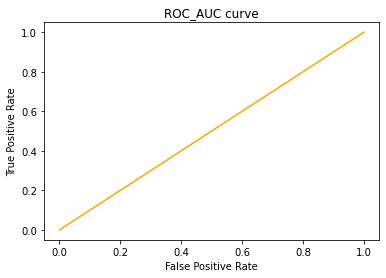

In [210]:
plt.plot(fpr,tpr,color='orange',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')                                                                                
plt.show()

In [211]:
auc_score = roc_auc_score(y_test,pred)*100
print("AUC_score",auc_score)

AUC_score 50.0


AUC_score is exactly equal to 50

The accuracy_score is better than the AUC_score

                                        Save the file

In [212]:
import joblib

joblib.dump(GCV.best_params_,'Avacado_region_Project.pkl')

['Avacado_region_Project.pkl']

                                       Conclusion

In [213]:
Prediction=pd.DataFrame({"Actual_value":y_test,"Predicted_value":pred})
Prediction

,Actual_value,Predicted_value
12467,0.0,0.0
15735,0.0,0.0
10805,1.0,0.0
739,0.0,0.0
1089,0.0,0.0
...,...,...
10889,1.0,0.0
6681,0.0,0.0
3799,0.0,0.0
15286,0.0,0.0
